In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

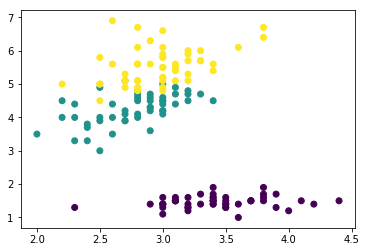

In [2]:
from sklearn import datasets


iris = datasets.load_iris()

X = iris.data[:, 1:3]  # we only take the first two features.
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [3]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn import metrics

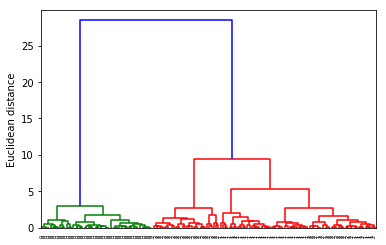

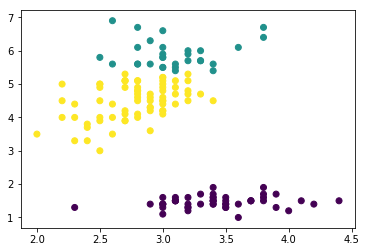

In [4]:
df = pd.DataFrame(X, index=y)
df

   
row_clusters = linkage(pdist(df, metric='euclidean'), method='ward') 
row_dendr = dendrogram(row_clusters, labels=y)

plt.ylabel('Euclidean distance')
plt.show()



part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()


# ELBOW method

Jaka ilość klastrów jest właściwa? W hierarchicznym klastrowaniu chcemy zbudować hierarchię klastrów, więc możemy patrzeć zarówno na konkretną ilość jak i na powiązania pomiędzy klastrami. Możemy użyć znanej metody ELBOW do wyznaczenia konkretnej ilości (błąd SSE zastępujemy odległością klastrów).



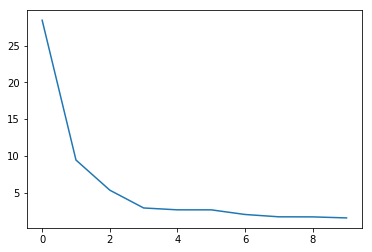

In [13]:
n = 10
last = row_clusters[-n:, 2]
last_rev = last[::-1]
plt.plot(last_rev)
plt.show()

In [5]:
n = 10
t=range(0,n+1)
last = row_clusters[-n:, :] #last ten merges (clustering into 1 to 10 groups)
last

array([[277.        , 284.        ,   1.56641842,  30.        ],
       [276.        , 285.        ,   1.7066217 ,  36.        ],
       [263.        , 270.        ,   1.71658576,   6.        ],
       [271.        , 288.        ,   2.03343055,  23.        ],
       [279.        , 289.        ,   2.66364467,  47.        ],
       [287.        , 291.        ,   2.66539553,  30.        ],
       [283.        , 290.        ,   2.91985268,  50.        ],
       [292.        , 293.        ,   5.34222617,  70.        ],
       [294.        , 296.        ,   9.43853298, 100.        ],
       [295.        , 297.        ,  28.45520456, 150.        ]])

In [6]:
last = row_clusters[-n:, 2] #last ten merges (clustering into 1 to 10 groups)
last





array([ 1.56641842,  1.7066217 ,  1.71658576,  2.03343055,  2.66364467,
        2.66539553,  2.91985268,  5.34222617,  9.43853298, 28.45520456])

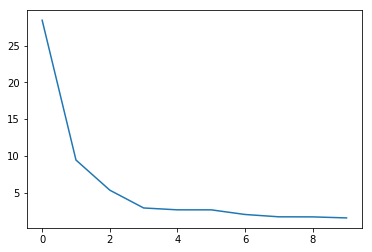

In [11]:
last_rev = last[::-1] #reverse ordr
plt.plot(last_rev)
# idxs = np.arange(1, len(last) + 1)
# plt.plot(idxs, last_rev)
# plt.xticks(range(len(t)), t, size='small')
plt.show()

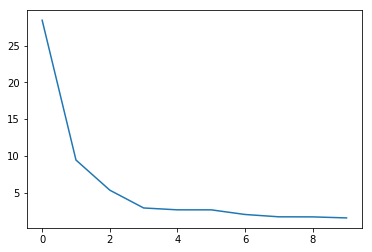

In [10]:
plt.plot(last_rev)
plt.show()

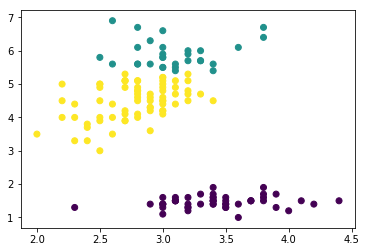

In [14]:
part = fcluster(row_clusters, 3, 'maxclust')
plt.scatter(X[:, 0], X[:, 1], c = part)
plt.show()

ZADANIE: Wziąć różne linkage functions i zobaczyć co wskazuje zasada ELBOW